**Authors:** Cihat Kaya, Mete Aslan

# Logistic Regression


**Logistic regression** is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

<img align="left" src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/Capture354.PNG?raw=true" width=450 > 


<p>In Logistic regression, it is not required to have the linear relationship between the dependent and independent variable.

Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign. In particular, these are examples of <b>binary</b> classification where there are two possible outcomes. Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'. 
</p>

<img align="left" src="https://drive.google.com/uc?export=view&id=1AySl2oRYgjtPLI-0QiRev4PbOoJJP6zj" width=450 > 

## Sigmoid or Logistic Function



- A Sigmoid function is a mathematical function which has a characteristic S-shaped curve.

- In deep learning as a non-linear activation function within neurons in artificial neural networks to allows the network to learn non-linear relationships between the data.
- In binary classification, also called logistic regression, the sigmoid function is used to predict the probability of a binary variable.

<img align="left" src="https://drive.google.com/uc?export=view&id=1o8pqtC6qWnf-ynEN1jV3OM8TaT_vPZ9V"  width=300>

<p align="rigth">For a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. </p>

<br>
<p align='rigth'>
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. <br>
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


Let's implement the sigmoid function and see this for ourselves.
</p>



## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).
 
The `sigmoid` function is implemented in python as shown in the cell below. 

Before that let's import the libraries to be used.

In [ ]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm
from ipywidgets import Output

> Here is the sigmoid function implementation:


In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

Let's see what the output of this function is for various value of `z`

In [ ]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,10)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]]


The values in the left column are `z`, and the values in the right column are `sigmoid(z)`. As you can see, the input values to the sigmoid range from -10 to 10, and the output values range from 0 to 1. 

Now, let's plot this function.

In [ ]:
#@title sigmoid function plot code
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
def draw_vthresh(ax,x):
    """ draws a threshold """
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
    ax.annotate("z >= 0", xy= [x,0.5], xycoords='data',
                xytext=[30,5],textcoords='offset points')
    d = FancyArrowPatch(
        posA=(x, 0.5), posB=(x+3, 0.5), color=dldarkred,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(d)
    ax.annotate("z < 0", xy= [x,0.5], xycoords='data',
                 xytext=[-50,5],textcoords='offset points', ha='left')
    f = FancyArrowPatch(
        posA=(x, 0.5), posB=(x-3, 0.5), color=dlblue,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(f)

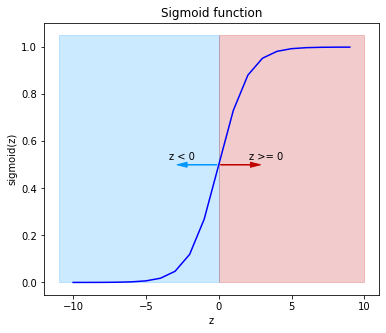

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,5))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0) # sigmoid function is defined in the section that says "sigmoid function plot codee"

As you can see, the sigmoid function approaches  `0` as `z` goes to large negative values and approaches `1` as `z` goes to large positive values.


## Logistic Regression
<img src="https://drive.google.com/uc?export=view&id=1l147YJn0gZgWp7uGSotSBQGRrzONREtl"  width=500 >

<img src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/reg.PNG?raw=true"  width=500 height = 282>


<hr>

 A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$
<hr>

<img align="left" src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/output.PNG?raw=true"  width=500>
<p>
- The model is predicting or the model thinks there's a 70 percent chance that the true label y would be equal to 1 for this patient. In other words, the model is telling us that it thinks the patient has a 70 percent chance of the tumor turning out to be malignant. We know that y has to be either 0 or 1, so if y has a 70 percent chance of being 1, than y has a 30 percent chance of being 0. Because the sum of their probabilities must be 100 percent. <p>

## Logistic Regression, Decision Boundary


### Logistic regression and Decision boundary
* Here is a example for **decision boundary**
<img src="https://www.researchgate.net/publication/349186066/figure/fig1/AS:989978611953666@1613040702298/Example-of-overfitting-in-classification-a-Decision-boundary-that-best-fits-training.png"  width=500 >

* Recall that for logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$
  
  
* Let's plot the sigmoid function to see where $g(z) >= 0.5$

<img src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/decision1.PNG?raw=true" width = 400, height = 250>


* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$
  
  
  
### Plotting decision boundary

Plot the decision boundary for a logistic regression model. This will give you a better sense of what the model is predicting.

* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$.

* Our logistic regression model has the form

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$

* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.

<img src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/decision2.PNG?raw=true" width = 350, height = 250>



* In the plot above, the blue line represents the line $x_0 + x_1 - 3 = 0$ and it should intersect the x1 axis at 3 (if we set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if we set $x_1$ = 0, $x_0$ = 3). 


* The shaded region represents $-3 + x_0+x_1 < 0$. The region above the line is $-3 + x_0+x_1 > 0$.


* Any point in the shaded region (under the line) is classified as $y=0$.  Any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".


## Logistic Loss Funtcion
Logistic Regression uses a loss function instead of squared error. Loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

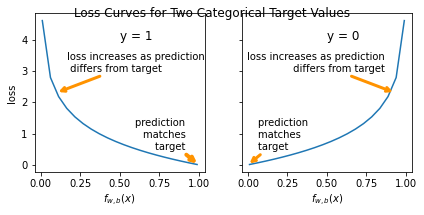

In [ ]:
#@title Plot two logistic loss curves
def plt_two_logistic_loss_curves():
    """ plots the logistic loss """
    fig,ax = plt.subplots(1,2,figsize=(6,3),sharey=True)
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    x = np.linspace(0.01,1-0.01,20)
    ax[0].plot(x,-np.log(x))
    #ax[0].set_title("y = 1")
    ax[0].text(0.5, 4.0, "y = 1", fontsize=12)
    ax[0].set_ylabel("loss")
    ax[0].set_xlabel(r"$f_{w,b}(x)$")
    ax[1].plot(x,-np.log(1-x))
    #ax[1].set_title("y = 0")
    ax[1].text(0.5, 4.0, "y = 0", fontsize=12)
    ax[1].set_xlabel(r"$f_{w,b}(x)$")
    ax[0].annotate("prediction \nmatches \ntarget ", xy= [1,0], xycoords='data',
                 xytext=[-10,30],textcoords='offset points', ha="right", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    ax[0].annotate("loss increases as prediction\n differs from target", xy= [0.1,-np.log(0.1)], xycoords='data',
                 xytext=[10,30],textcoords='offset points', ha="left", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    ax[1].annotate("prediction \nmatches \ntarget ", xy= [0,0], xycoords='data',
                 xytext=[10,30],textcoords='offset points', ha="left", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    ax[1].annotate("loss increases as prediction\n differs from target", xy= [0.93,-np.log(1-0.9)], xycoords='data',
                 xytext=[-10,30],textcoords='offset points', ha="right", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    plt.suptitle("Loss Curves for Two Categorical Target Values", fontsize=12)
    plt.tight_layout()
    plt.show()
plt_two_logistic_loss_curves()

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

Let's take a look at the cost vs parameters curve for the simple example we considered above:

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)

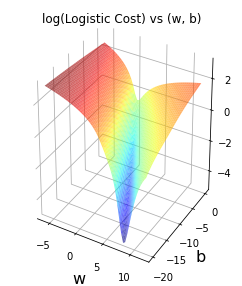

In [ ]:
#@title Plot Loss Function
plt.close('all')
def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out
def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    """
    Computes the cost using  using matrices
    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameter(s) of the model
      b : (scalar )                       Values of parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns:
      total_cost: (scalar)                cost
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + log_1pexp(z)
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0,0]                                                        # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost 
def plt_logistic_cost(X,y):
    """ plots logistic cost """
    wx, by = np.meshgrid(np.linspace(-6,12,50),
                         np.linspace(0, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0],dtype=np.longdouble)

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = compute_cost_matrix(X.reshape(-1,1), y, w, b, logistic=True, safe=True)
    cost = cost.reshape(wx.shape)

    fig = plt.figure(figsize=(9,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    ax.plot_surface(wx, by, np.log(cost), alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel('\nlog(Cost)', fontsize=16)
    ax.set_title('log(Logistic Cost) vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    plt.show()
    return cost
cst = plt_logistic_cost(x_train,y_train)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline.
<hr>

## Cost function

In the above, we developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

<a name='ex-02'></a>
#### Code Description

The algorithm for `compute_cost_logistic` loops over all the examples calculating the loss for each example and accumulating the total.

>**At the bottom, you will see a code example of logistic cost.**


In [ ]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


Check the implementation of the cost function using the cell below.

In [ ]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
w_tmp = np.array([1,1])
b_1 = -3
b_2 = -3
print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_tmp, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_tmp, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.36686678640551745


## Example
Now, let's see what the cost function output is for a different value of $w$. 

* In a previous, we plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `b = -3, w = np.array([1,1])`.

* Let's say we want to see if $b = -4, w_0 = 1, w_1 = 1$, or `b = -4, w = np.array([1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

You can see from this plot that `b = -4, w = np.array([1,1])` is a worse model for the training data. Let's see if the cost function implementation reflects this.

In [ ]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


**Expected output**

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`

<img src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/cost.PNG?raw=true" width = 350, height = 300>



## Logistic Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* **Gradient descent for linear and logistic regression looks like similar but:**
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$  
 
    
### Gradient Descent Implementation
The gradient descent algorithm implementation has two components: 
- The loop implementing equation (1) above. This is `gradient_descent` below.
- The calculation of the current gradient, equations (2,3) above. This is `compute_gradient_logistic` below.

#### Calculating the Gradient, Code Description
Implements equation (2),(3) above for all $w_j$ and $b$.
There are many ways to implement this. Outlined below is this:
- initialize variables to accumulate `dj_dw` and `dj_db`
- for each example
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in this example,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- divide `dj_db` and `dj_dw` by total number of examples (m)
- note that $\mathbf{x}^{(i)}$ in numpy `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`
    

>**At the bottom you will see a code example for gradient descent.**

In [ ]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [ ]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [ ]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


In [ ]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [ ]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


#### Gradient Descent Code 
The code implementing equation (1) above is implemented below.

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

In [ ]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28 5.08], b:-14.222409982019837


# Logistic Regression Exercise

## Exercise-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import sklearn.model_selection

In [ ]:
url = 'https://raw.githubusercontent.com/cihatkayack/Regresyon/main/heart_cleveland_upload.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


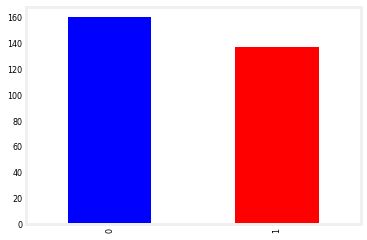

In [ ]:
df['condition'].value_counts().plot(kind = 'bar', color = ['blue','red']);

In [ ]:
X = df.drop("condition", axis = 1)
y = df["condition"]

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, train_size = 0.8,random_state=42)

In [ ]:
model = {"Logistic Regression": LogisticRegression()}

def fit_and_score(model, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in model.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores =  fit_and_score(model,
                            X_train = X_train,
                           y_train = y_train,
                           X_test = X_test,
                           y_test = y_test)
model_scores;

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


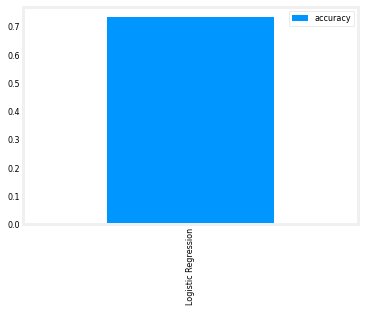

In [ ]:
model_compare  = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare.T.plot.bar();

## Exercise-2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import sklearn.model_selection
import sklearn.metrics
from sklearn.impute import SimpleImputer

In [ ]:
url = 'https://raw.githubusercontent.com/cihatkayack/Regresyon/main/Invistico_Airline.csv'
df = pd.read_csv(url)
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
#Verilerimizi kontrol ederseniz, bazı sütunlarımızın sayısal değerleri, bazılarının da kategorik değerleri vardır. Bu verileri lojistik regresyon algoritmamıza hazırlamak için bazı diğer veri ön işleme yöntemlerini uygulamamız gerekiyor. Ancak bunu yapmak için tüm sütunlarımızın veri türünü öğrenmemiz gerekiyor. Bunun için 2 metot oluşturalım ve bu metotların çıktılarını görmek için çalıştıralım.
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)
obj_col = object_cols(df)
num_col = numerical_cols(df)
print(obj_col)

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [ ]:
def label_encoding(column_name):
    label_encoder = LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name])

In [ ]:
label_encoding("satisfaction")
label_encoding("Gender")
label_encoding("Customer Type")
label_encoding("Type of Travel")
label_encoding("Class")

In [ ]:
X = df.drop("satisfaction", axis = 1)
y = df["satisfaction"]

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.33, random_state = 42)

In [ ]:
log_model = LogisticRegression(solver='lbfgs', max_iter=3000)
np.nan_to_num(X_train)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

log_model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
b_norm = log_model.intercept_
w_norm = log_model.coef_

print(f"w_norm: {w_norm}, b_norm: {b_norm}")

w_norm: [[-0.963 -2.032 -0.573 -0.903 -1.017 -0.732  1.446 -1.003 -1.124  0.625
  -0.308  3.511  0.454  1.03   1.578  1.154  0.435  1.489  0.456  0.834
  -2.361 -5.523]], b_norm: [-4.959]


In [ ]:
np.nan_to_num(X_test)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

log_model.score(X_test,y_test)

0.8348381978955227

In [ ]:
predictions = log_model.predict(X_test)
y_test = np.array(y_test)
for i in range(len(predictions)):
    print(f"{i}, Actual Value: {y_test[i]}, Prediction: {predictions[i]}")

Streaming output truncated to the last 5000 lines.
37861, Actual Value: 0, Prediction: 0
37862, Actual Value: 1, Prediction: 1
37863, Actual Value: 1, Prediction: 1
37864, Actual Value: 1, Prediction: 1
37865, Actual Value: 0, Prediction: 0
37866, Actual Value: 1, Prediction: 1
37867, Actual Value: 0, Prediction: 0
37868, Actual Value: 1, Prediction: 1
37869, Actual Value: 0, Prediction: 1
37870, Actual Value: 1, Prediction: 0
37871, Actual Value: 0, Prediction: 0
37872, Actual Value: 1, Prediction: 1
37873, Actual Value: 0, Prediction: 0
37874, Actual Value: 1, Prediction: 1
37875, Actual Value: 1, Prediction: 1
37876, Actual Value: 0, Prediction: 0
37877, Actual Value: 1, Prediction: 1
37878, Actual Value: 1, Prediction: 1
37879, Actual Value: 1, Prediction: 1
37880, Actual Value: 1, Prediction: 1
37881, Actual Value: 1, Prediction: 0
37882, Actual Value: 1, Prediction: 1
37883, Actual Value: 0, Prediction: 0
37884, Actual Value: 0, Prediction: 0
37885, Actual Value: 1, Prediction: 1

In [ ]:
benzerlik = 0
for i in range(len(y_test)):
    if(y_test[i] == predictions[i]):
        benzerlik += 1
print(benzerlik)
print(len(y_test))
print((benzerlik/len(y_test))*100)

35782
42861
83.48381978955227


# Overfitting-Underfitting and Regularization

Overfitting and Underfitting are two crucial and main concepts in machine learning and are the prevalent causes for the poor performance of a machine learning model.


The main goal of each machine learning model is to generalize well. Here generalization defines the ability of an ML model to provide a suitable output by adapting the given set of unknown input. It means after providing training on the dataset, it can produce reliable and accurate output. Hence, the underfitting and overfitting are the two terms that need to be checked for the performance of the model and whether the model is generalizing well or not.

Before understanding overfitting and underfitting, let's look two important terms: 

- **Bias:** Assumptions made by a model to make a function easier to learn. It is actually the error rate of the training data. When the error rate has a high value, we call it High Bias and when the error rate has a low value, we call it low Bias. It can be called Underfitting.
- **Variance:**  The difference between the error rate of training data and testing data is called variance. If the difference is high then it’s called high variance and when the difference of errors is low then it’s called low variance. Usually, we want to make a low variance for generalized our model.

<img src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/bias%20varias.PNG?raw=true" width=760 height=400 />

### Underfitting

When a model has not learned the patterns in the training data well and is unable to generalize well on the new data, it is known as underfitting. An underfit model has poor performance on the training data and will result in unreliable predictions. Underfitting occurs due to high bias and low variance. It only performs well on training data but performs poorly on testing data. Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough.

**Reason for Underfitting:**
- High bias and low variance
- Data used for training is not cleaned and contains noise (garbage values) in it
- The model is too simple.
- The size of the training dataset used is not enough.


### Overfitting

It is a problem that arises when the MachineLearning model catches the trend of our data more than it should. In other words, our model memorizes the data we give it rather than learning it. In this case, the machine learning model learns the details and noise in the training data such that it negatively affects the performance of the model on test data. Overfitting can happen due to low bias and high variance.

**Reason for Overfitting:**
- Low bias and high varianca
- The size of the training dataset used is not enough
- The model is too complex

<img align="left" src="https://media.geeksforgeeks.org/wp-content/uploads/20210323204619/imgonlinecomuaresizeLOjqonkALC.jpg"> 

<img align="left" src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png"> 


### How can these be avoided?

**Overfitting:**
- Collect more data.
- Reduce size of parameters "Regularization"
- The complexity of the model can be reduced

**Underfitting:**
- Remove noise from the data.
- Increase the number of features, performing feature engineering
- Increase the number of epochs or increase the duration of training to get better results.

### Regularization

Sometimes the machine learning model performs well with training data but not well with test data. This means that the model cannot predict the output when dealing with unseen data by adding noise to the output, and this is why the model is called overfitting. This problem can be solved with the help of an editing technique.

This technique can be used by reducing the size of the variables, allowing all variables or features in the model to be preserved. Therefore, it maintains accuracy as well as a generalization of the model.

**If you look at an overfit model like below:**



You find that the parameters are often relatively large. Now if you were to eliminate some of these features, that corresponds to setting these parameters to 0. 

It turns out that regularization is a way to more gently reduce the impacts of some of the features without doing something as harsh as eliminating it outright. What regularization does is encourage the learning algorithm to shrink the values of the parameters without necessarily demanding that the parameter is set to exactly 0.

**You can see what that means in below:**

<img src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/overfit%20regularization.PNG?raw=true"/>

You find that the parameters are often relatively large. Now if you were to eliminate some of these features, that corresponds to setting these parameters to 0. 

It turns out that regularization is a way to more gently reduce the impacts of some of the features without doing something as harsh as eliminating it outright. What regularization does is encourage the learning algorithm to shrink the values of the parameters without necessarily demanding that the parameter is set to exactly 0.

**You can see what that means in below:**


<img src="https://github.com/cihatkayack/Regresyon/blob/main/kodlarda%20kullan%C4%B1lan%20fotolar/regularized.PNG?raw=true">

It is advantageous even if you fit a higher order polynomial like this, as long as you can get the algorithm to use smaller parameter values : w1, w2, w3, w4. You end up with a curve that fits the training data much better.

By the way, by convention, we normally just reduce the size of the wj parameters, that is w1 through wn. It doesn't make a huge difference whether you regularize the parameter b as well, you could do so if you want or not if you don't.

So what editing does is it allows you to keep all of your features, but only prevents features from having an overly large impact, which can sometimes lead to overfitting.

##  Regularized Cost and Gradient

### Regularized Cost

Regularization is a concept by which machine learning algorithms can be prevented from overfitting a dataset. The regulation achieves this by introducing a punitive term to the cost function that assigns a higher penalty to complex curves.

**There are essentially two types of regularization techniques:**

- L1 Regularization or LASSO regression
- L2 Regularization or Ridge regression

**L2 Regularization or Ridge regression:**
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $$ 

$$ Sum of squared errors + 𝜆(coefficients)^2 $$

where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  $$ 

Here lambda (𝜆) is a hyperparameter and this determines how severe the penalty is. The value of lambda can vary from 0 to infinity. It can be observed that when the lambda value is zero, the penalty term no longer affects the value of the cost function and thus the cost function is reduced to the sum of the squared errors.


Let's look at an example to understand the penalty term and to see how it works.

Firstly look at an overfitting curve with degree 15.



<img align="left" src="https://miro.medium.com/max/1100/1*UGWRKn-mvzOK52ksGvRThw.webp"> 




Now, look at he effect of penalty term.
### Effect of varying the values of lambda

<img align="left" src="https://miro.medium.com/max/1100/1*9XZ_c6gMmYpIlVqLyauRmQ.webp"> 


As noted earlier, the penalty term no longer affects the value of the cost function if alpha equals zero. Hence, we get the same overfitting curve on the left image above. But when the lambda value is increased, we get a simpler curve represented by the graph on the middle in the image above.

We observe that as the lambda value increases, the model becomes simpler until it is asymptotically parallel to the x-axis. In other words, for a very high lambda value, we have a highly biased model.

When we compare the mean squares of errors for the left and middle models, we observe that the error in the training set for the overfitting curve is minimal, but there is a significant reduction in the error observed in the test set for the simpler curve.

By simplifying our curve we introduce some errors in the training set, but this allows us to move towards a more generalized model.

**How was this achieved?**

Lambda is a hyperparameter determining the severity of the penalty. As the value of the penalty increases, the coefficients shrink in value in order to minimize the cost function. Since these coefficients also act as weights for the polynomial terms, shrinking these will reduce the weight assigned to them and ultimately reduce its impact. Therefore, for the case above, the coefficients assigned to higher degrees of polynomial terms have shrunk to an extent where the value of such terms no longer impacts the model as severely as it did before and so we have a simple curve.



## Cost functions with regularization
### Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Compare this to the cost function without regularization, which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


### Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$ 

Compare this to the cost function without regularization:

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized.

In [ ]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost 

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


## Gradient descent with regularization
The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.

### Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

### Gradient function for regularized linear regression

In [ ]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


### Gradient function for regularized logistic regression

In [ ]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [ ]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  


In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


**References:**
- https://www.coursera.org/learn/machine-learning
- https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
- https://www.javatpoint.com/
- https://towardsdatascience.com/understanding-regularization-in-machine-learning-d7dd0729dde5#:~:text=Regularization%20is%20a%20concept%20by,higher%20penalty%20to%20complex%20curves.